In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loal data 
diabetes_data = pd.read_csv(r'.\diabetes.csv')

<AxesSubplot: >

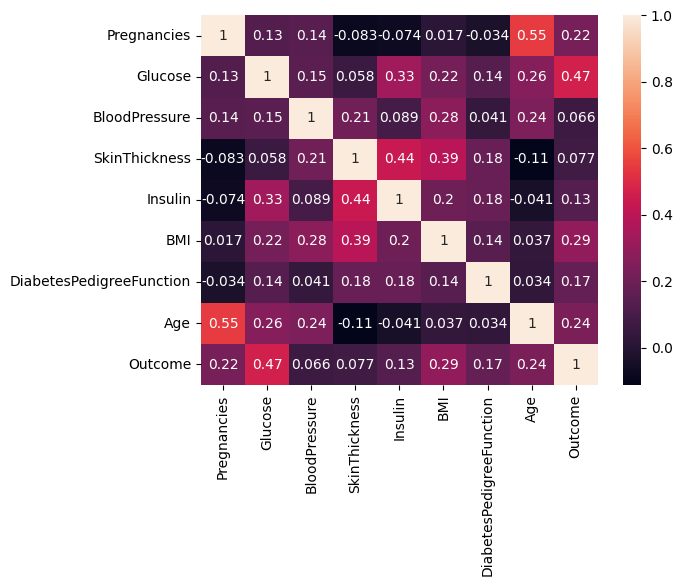

In [13]:
plt.figure()
sns.heatmap(diabetes_data.corr(), annot=True)

In [15]:

# KNN算法
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test=train_test_split(\
    diabetes_data.iloc[:,diabetes_data.columns !='Outcome'],\
    diabetes_data['Outcome'],stratify=diabetes_data['Outcome'],random_state=66)


In [4]:

from sklearn.neighbors import KNeighborsClassifier
# 保存不同k值测试集准确率
training_accuracy = []
# 保存不同k值训练集准确率
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    #record training set accuracy 保存训练集准确率
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy  保存测试集准确率
    test_accuracy.append(knn.score(X_test,y_test))


Text(0.5, 0, 'n_neighbors')

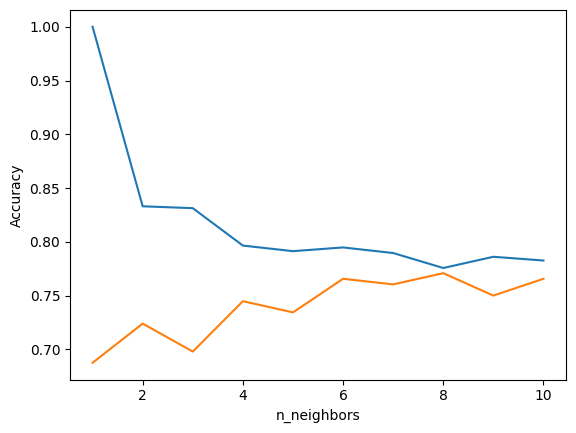

In [5]:
plt.figure()
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

In [6]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set:0.78
Accuracy of K-NN classifier on training set:0.77


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       139
           1       0.57      0.72      0.63        53

    accuracy                           0.77       192
   macro avg       0.72      0.75      0.73       192
weighted avg       0.79      0.77      0.78       192



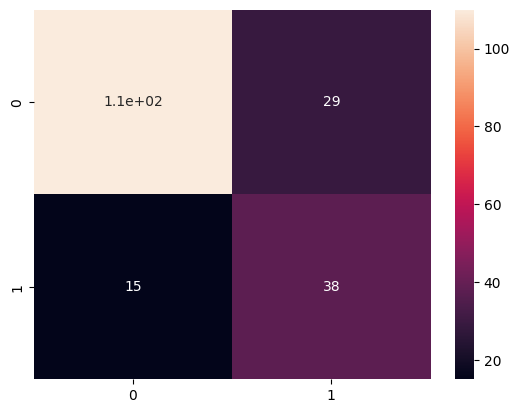

<Figure size 640x480 with 0 Axes>

In [8]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)
plt.figure()

plt.show()


In [9]:
from sklearn.linear_model import Perceptron

In [10]:
clf = Perceptron(fit_intercept=True,tol = None,max_iter=100000,shuffle=True,n_jobs=-1,)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.7170000e+03  4.9400000e+02 -1.5700000e+02  4.6000000e+01
   1.2800000e+02  1.2503000e+03  1.3307555e+04  3.0000000e+00]]
[-110370.]


In [11]:
acc = clf.score(X_test,y_test)    # 使用测试集进行验证
print(acc)

0.6979166666666666


In [14]:
# 导入包
from sklearn.model_selection import KFold
import numpy as np
# 构建数据集
X = np.arange(24).reshape(12,2)
print(X)
# KFold()
# 参数：
# n_splits: 分为几折交叉验证
# shuffle: 是否随机,设置为True后每次的结果都不一样。
# random_state: 设置随机因子，设置了这个参数之后，每次生成的结果是一样的，而且设置了random_state之后就没必要设置shuffle了。

kf = KFold(n_splits=3,shuffle=True)
for train,test in kf.split(X):
    # 返回值是元组，训练集和验证集组成的元组
    print('%s %s' % (train, test))


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
[ 0  1  2  4  5  8  9 11] [ 3  6  7 10]
[ 0  1  3  5  6  7  8 10] [ 2  4  9 11]
[ 2  3  4  6  7  9 10 11] [0 1 5 8]


失败：

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True)
for train,test in kf.split(diabetes_data):
   # X_train=train.iloc[:,train.columns !='Outcome']
   # y_train=train['Outcome']
   # X_test=test.iloc[:,train.columns !='Outcome']
   # y_test=test['Outcome']
    X_train,y_train=diabetes_data.iloc[:,train.columns !='Outcome'][train],diabetes_data['Outcome'][train]
    x_test,y_test=diabetes_data.iloc[:,train.columns !='Outcome'][test],diabetes_data['Outcome'][test]
    clf = Perceptron(fit_intercept=True,tol = None,max_iter=10000,shuffle=True,n_jobs=-1,)
    clf.fit(X_train, y_train)
    print(clf.coef_)
    print(clf.intercept_)
    acc = clf.score(X_test,y_test)    # 使用测试集进行验证
    print(acc)

In [16]:
import numpy as np
from sklearn.metrics import roc_auc_score
 
 
def calc_auc(y_labels, y_scores):
    f = list(zip(y_scores, y_labels))
    rank = [values2 for values1, values2 in sorted(f, key=lambda x:x[0])]
    rankList = [i+1 for i in range(len(rank)) if rank[i] == 1]
    pos_cnt = np.sum(y_labels == 1)
    neg_cnt = np.sum(y_labels == 0)
    auc = (np.sum(rankList) - pos_cnt*(pos_cnt+1)/2) / (pos_cnt*neg_cnt)
    print(auc)
 
 
def get_score():
    # 随机生成100组label和score
    y_labels = np.zeros(100)
    y_scores = np.zeros(100)
    for i in range(100):
        y_labels[i] = np.random.choice([0, 1])
        y_scores[i] = np.random.random()
    return y_labels, y_scores
 
 
if __name__ == '__main__':
    y_labels, y_scores = get_score()
    # 调用sklearn中的方法计算AUC，与后面自己写的方法作对比
    print('sklearn AUC:', roc_auc_score(y_labels, y_scores))
    calc_auc(y_labels, y_scores)

sklearn AUC: 0.5274989963869933
0.5274989963869932


In [17]:
import numpy as np
from sklearn.metrics import roc_curve, auc

y = np.array([1, 1, 1, 1, 1,
              2, 2, 2, 2, 2])
y_proba = np.array([0.1, 0.4, 0.4, 0.3, 0.5,
                    0.4, 0.6, 0.7, 0.8, 0.5])   # probability of prediction as positive

fpr, tpr, thresholds = roc_curve(y, y_proba, pos_label=2)
auc = auc(fpr, tpr)

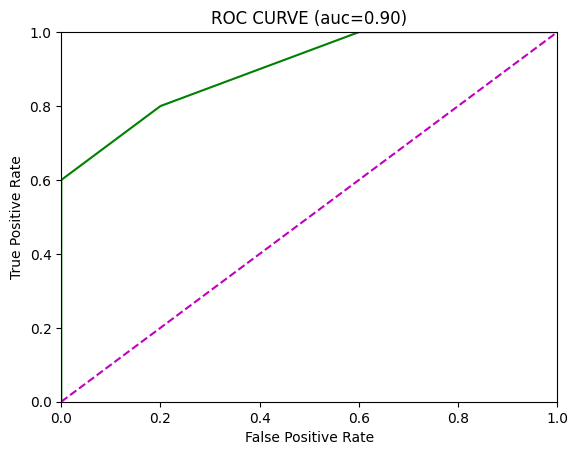

0.9


In [20]:
#ROC曲线绘制
plt.figure()
plt.title('ROC CURVE (auc={:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(fpr,tpr,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()